In [1]:
!pip install tensorflow==2.11.0 matplotlib
!pip install tensorflow-io

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
!pip install tensorflow-gpu

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
!unzip /content/drive/MyDrive/dataset/archive.zip

Archive:  /content/drive/MyDrive/dataset/archive.zip
replace archive/Forest Recordings/recording_00.mp3? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: archive/Forest Recordings/recording_00.mp3  
  inflating: archive/Forest Recordings/recording_01.mp3  
  inflating: archive/Forest Recordings/recording_02.mp3  
  inflating: archive/Forest Recordings/recording_03.mp3  
  inflating: archive/Forest Recordings/recording_04.mp3  
  inflating: archive/Forest Recordings/recording_05.mp3  
  inflating: archive/Forest Recordings/recording_06.mp3  
  inflating: archive/Forest Recordings/recording_07.mp3  
  inflating: archive/Forest Recordings/recording_08.mp3  
  inflating: archive/Forest Recordings/recording_09.mp3  
  inflating: archive/Forest Recordings/recording_10.mp3  
  inflating: archive/Forest Recordings/recording_11.mp3  
  inflating: archive/Forest Recordings/recording_12.mp3  
  inflating: archive/Forest Recordings/recording_13.mp3  
  inflating: archive/Forest Recordings/reco

In [5]:
import os
from matplotlib import pyplot as plt
import tensorflow as tf 
import tensorflow_io as tfio

# **Build Data Loading Function**

### **Paths of Files**

In [6]:
CAPUCHIN_FILE = '/content/archive/Parsed_Capuchinbird_Clips/XC3776-3.wav'
NOT_CAPUCHIN_FILE = '/content/archive/Parsed_Not_Capuchinbird_Clips/afternoon-birds-song-in-forest-0.wav'

In [7]:
NOT_CAPUCHIN_FILE

'/content/archive/Parsed_Not_Capuchinbird_Clips/afternoon-birds-song-in-forest-0.wav'

### **Build Dataloading Function**

In [8]:
def load_wav_16k_mono(filename): 
    file_contents = tf.io.read_file(filename) # Load encoded wav file
    wav, sample_rate = tf.audio.decode_wav(file_contents, desired_channels=1) # Decode wav (tensors by channels) 
    wav = tf.squeeze(wav, axis=-1) # Removes trailing axis
    sample_rate = tf.cast(sample_rate, dtype=tf.int64)  
    wav = tfio.audio.resample(wav, rate_in=sample_rate, rate_out=16000) # Goes from 44100Hz to 16000hz - amplitude of the audio signal
    return wav

In [9]:
file_contents =tf.io.read_file(CAPUCHIN_FILE)

In [10]:
wav, sample_rate = tf.audio.decode_wav(file_contents, desired_channels=1)

In [11]:
sample_rate

<tf.Tensor: shape=(), dtype=int32, numpy=44100>

### **Plot Wave**

In [12]:
wave = load_wav_16k_mono(CAPUCHIN_FILE)
nwave = load_wav_16k_mono(NOT_CAPUCHIN_FILE)

In [13]:
wave

<tf.Tensor: shape=(48000,), dtype=float32, numpy=
array([ 8.9910554e-07, -2.7947258e-06,  7.0741157e-06, ...,
       -1.0823049e-02, -3.5766482e-03,  1.5143131e-02], dtype=float32)>

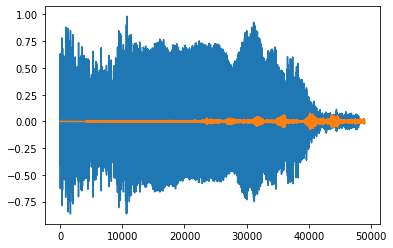

In [14]:
plt.plot(wave)
plt.plot(nwave)
plt.show()

# **Create Tensorflow Dataset**

In [15]:
POS = '/content/archive/Parsed_Capuchinbird_Clips'
NEG = '/content/archive/Parsed_Not_Capuchinbird_Clips'

In [16]:
pos = tf.data.Dataset.list_files(POS+'/*.wav')
neg = tf.data.Dataset.list_files(NEG+'/*.wav')

In [17]:
pos.as_numpy_iterator().next()

b'/content/archive/Parsed_Capuchinbird_Clips/XC44070-0.wav'

In [18]:
len(pos)

217

In [19]:
tf.ones(len(pos))

<tf.Tensor: shape=(217,), dtype=float32, numpy=
array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1

In [20]:
tf.zeros(len(neg))

<tf.Tensor: shape=(593,), dtype=float32, numpy=
array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0

### **Add labels and Combine Positive and Negative Samples**

In [21]:
positives = tf.data.Dataset.zip((pos, tf.data.Dataset.from_tensor_slices(tf.ones(len(pos)))))
negatives = tf.data.Dataset.zip((neg, tf.data.Dataset.from_tensor_slices(tf.zeros(len(neg)))))
data = positives.concatenate(negatives)

In [22]:
positives.as_numpy_iterator().next()

(b'/content/archive/Parsed_Capuchinbird_Clips/XC65196-3.wav', 1.0)

In [23]:
negatives.as_numpy_iterator().next()

(b'/content/archive/Parsed_Not_Capuchinbird_Clips/tawny-owl-sounds-2.wav', 0.0)

In [24]:
data.as_numpy_iterator().next()

(b'/content/archive/Parsed_Capuchinbird_Clips/XC520626-0.wav', 1.0)

In [25]:
data.shuffle(1000).as_numpy_iterator().next()

(b'/content/archive/Parsed_Not_Capuchinbird_Clips/tawny-owl-sounds-4.wav', 0.0)

# **Determine Average Length of a Capuchin Call**

In [26]:
lengths = [] # amplitude
for file in os.listdir('/content/archive/Parsed_Capuchinbird_Clips'):
    tensor_wave = load_wav_16k_mono(f'/content/archive/Parsed_Capuchinbird_Clips/{file}')
    lengths.append(len(tensor_wave))

In [27]:
os.listdir('/content/archive/Parsed_Capuchinbird_Clips')

['XC495697-0.wav',
 'XC16803-0.wav',
 'XC44070-2.wav',
 'XC22397-5.wav',
 'XC216012-6.wav',
 'XC395129-5.wav',
 'XC79965-8.wav',
 'XC27882-0.wav',
 'XC216010-4.wav',
 'XC178168-1.wav',
 'XC227469-0.wav',
 'XC216012-1.wav',
 'XC27882-2.wav',
 'XC526106-3.wav',
 'XC216010-7.wav',
 'XC178168-0.wav',
 'XC520626-1.wav',
 'XC395129-1.wav',
 'XC216012-0.wav',
 'XC201990-3.wav',
 'XC600460-2.wav',
 'XC216010-1.wav',
 'XC216012-16.wav',
 'XC227468-2.wav',
 'XC46241-3.wav',
 'XC216010-3.wav',
 'XC227469-1.wav',
 'XC227471-5.wav',
 'XC98557-1.wav',
 'XC16803-2.wav',
 'XC388470-0.wav',
 'XC387509-5.wav',
 'XC46077-1.wav',
 'XC216012-14.wav',
 'XC79965-4.wav',
 'XC44070-1.wav',
 'XC216010-0.wav',
 'XC526106-4.wav',
 'XC79965-9.wav',
 'XC395129-4.wav',
 'XC433953-9.wav',
 'XC395129-2.wav',
 'XC216012-19.wav',
 'XC433953-0.wav',
 'XC227471-6.wav',
 'XC401294-0.wav',
 'XC395129-0.wav',
 'XC114131-3.wav',
 'XC22397-0.wav',
 'XC178167-3.wav',
 'XC433953-2.wav',
 'XC3776-3.wav',
 'XC46241-2.wav',
 'XC520

### **Calculate Mean, Min and Max**

In [28]:
tf.math.reduce_mean(lengths)

<tf.Tensor: shape=(), dtype=int32, numpy=54156>

In [29]:
54156/16000 # 54156,16000 is amplitude(Hz --> times per second) ,So 3.38475 is Length of the video clip

3.38475

In [30]:
tf.math.reduce_min(lengths)

<tf.Tensor: shape=(), dtype=int32, numpy=32000>

In [31]:
tf.math.reduce_max(lengths)

<tf.Tensor: shape=(), dtype=int32, numpy=80000>

# **Build Preprocessing Function to Convert to Spectrogram**

In [32]:
def preprocess(file_path, label): 
    wav = load_wav_16k_mono(file_path)
    wav = wav[:48000]
    zero_padding = tf.zeros([48000] - tf.shape(wav), dtype=tf.float32) #list ของ 0 ตามจำนวนที่ขาด
    wav = tf.concat([zero_padding, wav],0) #เติม 0 เข้าไปในคลิปที่ความถี่ไม่ถึง 48000 ให้ครบ 48000
    spectrogram = tf.signal.stft(wav, frame_length=320, frame_step=32)
    spectrogram = tf.abs(spectrogram)
    spectrogram = tf.expand_dims(spectrogram, axis=2)
    return spectrogram, label

In [33]:
filepath, label = negatives.shuffle(buffer_size=10000).as_numpy_iterator().next()

In [34]:
spectrogram, label = preprocess(filepath, label)

In [35]:
spectrogram

<tf.Tensor: shape=(1491, 257, 1), dtype=float32, numpy=
array([[[1.53599203e+00],
        [1.21949708e+00],
        [5.67434490e-01],
        ...,
        [1.27054387e-04],
        [9.39532765e-05],
        [4.44650650e-05]],

       [[1.56861687e+00],
        [1.23738015e+00],
        [5.78134656e-01],
        ...,
        [1.20664445e-04],
        [7.00546298e-05],
        [3.29017639e-05]],

       [[1.53589392e+00],
        [1.22019053e+00],
        [5.62923729e-01],
        ...,
        [1.00215198e-04],
        [7.02834877e-05],
        [4.67896461e-05]],

       ...,

       [[3.05979818e-01],
        [3.41452777e-01],
        [3.19570631e-01],
        ...,
        [1.13482855e-03],
        [7.73533829e-04],
        [4.66287136e-04]],

       [[4.27058250e-01],
        [3.97626758e-01],
        [2.84043908e-01],
        ...,
        [1.15939998e-03],
        [6.58165314e-04],
        [5.76078892e-05]],

       [[4.69814628e-01],
        [4.00791049e-01],
        [2.38769040e-01]

In [36]:
label

0.0

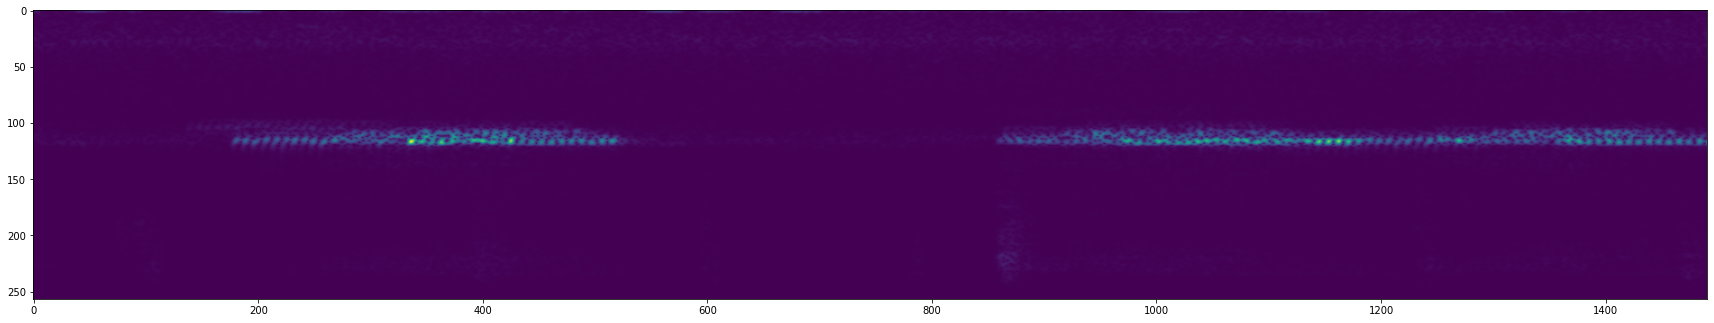

In [37]:
plt.figure(figsize=(30,20))
plt.imshow(tf.transpose(spectrogram)[0])
plt.show()

# **Create Training and Testing Partitions**

In [38]:
data = data.map(preprocess)
data = data.cache()
data = data.shuffle(buffer_size=1000)
data = data.batch(16)
data = data.prefetch(8)

Instructions for updating:
Lambda fuctions will be no more assumed to be used in the statement where they are used, or at least in the same block. https://github.com/tensorflow/tensorflow/issues/56089


In [39]:
len(data)

51

In [66]:
train = data.take(36)
test = data.skip(36).take(15)

In [52]:
xtrain, ytrain = train.as_numpy_iterator().next()

In [50]:
xtest, ytest = test.as_numpy_iterator().next()

In [53]:
xtrain.shape, xtest.shape, ytrain.shape, ytest.shape

((16, 1491, 257, 1), (16, 1491, 257, 1), (16,), (16,))

In [43]:
labels

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 1., 0.],
      dtype=float32)

# **Build Deep Learning Model**

In [44]:
from tensorflow import keras
from keras.layers import Dense
from keras.layers import Conv2D
from keras.layers import Flatten
from keras.models import Sequential, load_model

In [83]:
model = Sequential()
model.add(Conv2D(8, (3,3), activation='relu', input_shape=(1491, 257,1)))
model.add(Conv2D(8, (3,3), activation='relu'))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

ResourceExhaustedError: ignored

In [81]:
model.compile(optimizer='adam',loss='BinaryCrossentropy',metrics=[tf.keras.metrics.Recall(), tf.keras.metrics.Precision()])

In [74]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 1489, 255, 16)     160       
                                                                 
 conv2d_1 (Conv2D)           (None, 1487, 253, 16)     2320      
                                                                 
 flatten (Flatten)           (None, 6019376)           0         
                                                                 
 dense (Dense)               (None, 128)               770480256 
                                                                 
 dense_1 (Dense)             (None, 1)                 129       
                                                                 
Total params: 770,482,865
Trainable params: 770,482,865
Non-trainable params: 0
_________________________________________________________________


In [82]:
hist = model.fit(xtrain,ytrain ,batch_size=4,epochs=4, validation_data=(xtest,ytest))

Epoch 1/4


ResourceExhaustedError: ignored

In [ ]:
plt.title('Loss')
plt.plot(hist.history['loss'], 'r')
plt.plot(hist.history['val_loss'], 'b')
plt.show()

In [ ]:
plt.title('Precision')
plt.plot(hist.history['precision'], 'r')
plt.plot(hist.history['val_precision'], 'b')
plt.show()

In [ ]:
plt.title('Recall')
plt.plot(hist.history['recall'], 'r')
plt.plot(hist.history['val_recall'], 'b')
plt.show()